# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading the csv files

In [2]:
previous_application= pd.read_csv("previous_application.csv")
application_data= pd.read_csv('application_data.csv')

# Checking if the files have loaded

In [3]:
previous_application.shape

(1670214, 37)

In [4]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
application_data.shape

(307511, 122)

In [6]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# DATA CLEANING

# Let's start with null values

In [7]:
application_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
null_pc = application_data.isnull().sum()*100/len(application_data)
major_missing_columns = null_pc[null_pc >=40]
major_missing_columns

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [9]:
major_missing_columns.shape

(49,)

# Creating new dataframe named application_data1

In [10]:
application_data1 = application_data.drop(columns=major_missing_columns.index)
#new dataframe without the 49 columns which had null values higher than 40%

In [11]:
application_data1.shape

(307511, 73)

##### Let's check for unwanted columns

In [12]:
application_data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
application_data1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [14]:
unwanted_column = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
application_data1.drop(labels=unwanted_column,axis=1,inplace=True)

In [15]:
application_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [16]:
application_data1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,306490.000000,306490.000000,306490.000000,306490.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,1.422245,0.143421,1.405292,0.100049,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,2.400989,0.446698,2.379803,0.362291,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,348.000000,34.000000,344.000000,24.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [17]:
application_data1.shape

(307511, 41)

In [18]:
application_data1.DAYS_BIRTH.value_counts(normalize=True)

-13749    0.000140
-13481    0.000137
-18248    0.000133
-10020    0.000133
-15771    0.000130
            ...   
-24898    0.000003
-24868    0.000003
-8017     0.000003
-25098    0.000003
-25061    0.000003
Name: DAYS_BIRTH, Length: 17460, dtype: float64

#### Let's change them to positive value

In [19]:
application_data1[['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373
std,4363.988632,141275.766519,3522.886321,1509.450419
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000
max,-7489.000000,365243.000000,0.000000,0.000000


In [20]:
#create a variable 'days_columns' and assign 'DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH' to it
days_columns = ['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']

In [21]:
application_data1[days_columns] = application_data1[days_columns].abs()

In [22]:
application_data1[['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373
std,4363.988632,139443.751806,3522.886321,1509.450419
min,7489.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000
max,25229.000000,365243.000000,24672.000000,7197.000000


In [23]:
# you can see that the values have changed

#### Let's convert days into years for better understanding

In [24]:
application_data1[days_columns] = application_data1[days_columns]/365

In [25]:
application_data1[['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.936973,185.547239,13.660604,8.203294
std,11.956133,382.037676,9.651743,4.135481
min,20.517808,0.000000,0.000000,0.000000
25%,34.008219,2.556164,5.506849,4.712329
50%,43.150685,6.079452,12.339726,8.915068
75%,53.923288,15.635616,20.491781,11.778082
max,69.120548,1000.665753,67.594521,19.717808


In [26]:
application_data1.rename(columns={'DAYS_BIRTH':'YEARS_BIRTH' ,'DAYS_EMPLOYED':'YEARS_EMPLOYED' , 'DAYS_REGISTRATION':'YEARS_REGISTRATION' ,'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, inplace=True)

In [27]:
application_data1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH',
       'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ

#### Let's run some more checks

In [28]:
application_data1.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
CNT_CHILDREN                      15
AMT_INCOME_TOTAL                2548
AMT_CREDIT                      5603
AMT_ANNUITY                    13672
AMT_GOODS_PRICE                 1002
NAME_TYPE_SUITE                    7
NAME_INCOME_TYPE                   8
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
REGION_POPULATION_RELATIVE        81
YEARS_BIRTH                    17460
YEARS_EMPLOYED                 12574
YEARS_REGISTRATION             15688
YEARS_ID_PUBLISH                6168
OCCUPATION_TYPE                   18
WEEKDAY_APPR_PROCESS_START         7
HOUR_APPR_PROCESS_START           24
REG_REGION_NOT_LIVE_REGION         2
REG_CITY_NOT_LIVE_CITY             2
REG_CITY_NOT_WORK_CITY             2
L

In [29]:
application_data1.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [30]:
application_data1.loc[application_data1['CODE_GENDER']=='XNA', 'CODE_GENDER'] = 'F'
application_data1['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [31]:
#Check the number of children a client has column
application_data1.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

### Let's make 2 new columns to divide 'AMT_INCOME_TOTAL' and 'AMT_CREDIT' into categories for easy understanding

In [32]:
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

application_data1['AMT_INCOME_RANGE']=pd.cut(application_data1['AMT_INCOME_TOTAL'],bins,labels=slot)

In [33]:
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

application_data1['AMT_CREDIT_RANGE']=pd.cut(application_data1['AMT_CREDIT'],bins=bins,labels=slots)

In [34]:
application_data1.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
YEARS_BIRTH                       0
YEARS_EMPLOYED                    0
YEARS_REGISTRATION                0
YEARS_ID_PUBLISH                  0
OCCUPATION_TYPE               96391
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_CITY_NOT_LIVE_CITY            0
REG_CITY_NOT_WORK_CITY            0
LIVE_CITY_NOT_WORK_CITY     

In [35]:
application_data1 = application_data1[-application_data1.AMT_ANNUITY.isnull()]

In [36]:
application_data1.AMT_GOODS_PRICE.fillna(application_data1.AMT_GOODS_PRICE.median(), inplace=True)

In [37]:
application_data1.AMT_GOODS_PRICE.isna().sum()

0

#### Now let's fill the 'na' values in 'NAME_TYPE_SUITE' with its mode value

In [38]:
application_data1.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

In [39]:
application_data1.NAME_TYPE_SUITE.fillna('Unaccompanied', inplace=True)

In [40]:
application_data1.NAME_TYPE_SUITE.isna().sum()

0

#### Let's replace the 'na' values in 'EXT_SOURCE_2' and 'EXT_SOURCE_3' with median values

In [41]:
application_data1.EXT_SOURCE_2.fillna(application_data1.EXT_SOURCE_2.median(), inplace=True)

In [42]:
application_data1.EXT_SOURCE_2.isna().sum()

0

In [43]:
application_data1.EXT_SOURCE_3.fillna(application_data1.EXT_SOURCE_3.median(), inplace=True)

In [44]:
application_data1.EXT_SOURCE_3.isna().sum()

0

# OUTLIERS

In [45]:
application_data1.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265981.000000
mean          0.006403
std           0.083851
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [46]:
application_data1.AMT_REQ_CREDIT_BUREAU_HOUR.quantile([0.1,0.4,0.6,0.8, 0.999])

0.100    0.0
0.400    0.0
0.600    0.0
0.800    0.0
0.999    1.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [47]:
application_data1.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264355
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

#### You can see that 66 values are above 1 while 1626 values are more than 0 while 264355 values are 0. What we can basically do is replace the 'na' values with 0. Also, for the outliers, let's not make any change, but just keep in mind that we have outliers value

In [48]:
application_data1.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264492
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [49]:
application_data1.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    265981.000000
mean          0.007001
std           0.110760
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [50]:
application_data1.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    257448
1.0      8205
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [51]:
application_data1.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count    265981.000000
mean          0.034352
std           0.204663
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [52]:
application_data1.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    265981.000000
mean          0.267384
std           0.916010
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [53]:
application_data1.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     222227
1.0      33143
2.0       5385
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [54]:
application_data1.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215409
1.0       33859
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [55]:
application_data1.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265981.000000
mean          0.265474
std           0.794067
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [56]:
application_data1.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265981.000000
mean          1.899925
std           1.869212
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [57]:
application_data1.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71800
1.0     63401
2.0     50190
3.0     33628
4.0     20713
5.0     12051
6.0      6966
7.0      3869
8.0      2127
9.0      1096
12.0       30
11.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [58]:
application_data1.nunique().sort_values()

TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        2
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
REG_CITY_NOT_LIVE_CITY             2
REG_CITY_NOT_WORK_CITY             2
LIVE_CITY_NOT_WORK_CITY            2
REG_REGION_NOT_LIVE_REGION         2
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_HOUSING_TYPE                  6
NAME_FAMILY_STATUS                 6
NAME_TYPE_SUITE                    7
WEEKDAY_APPR_PROCESS_START         7
NAME_INCOME_TYPE                   8
AMT_REQ_CREDIT_BUREAU_DAY          9
DEF_60_CNT_SOCIAL_CIRCLE           9
AMT_REQ_CREDIT_BUREAU_WEEK         9
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_QRT         11
CNT_CHILDREN                      15
AMT_CREDIT_RANGE                  17
OCCUPATION_TYPE                   18
AMT_INCOME_RANGE                  20
AMT_REQ_CREDIT_BUREAU_MON         24
HOUR_APPR_PROCESS_START           24
A

In [59]:
application_data1.nunique().sort_values().index

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_EDUCATION_TYPE',
       'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'NAME_TYPE_SUITE',
       'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_CHILDREN', 'AMT_CREDIT_RANGE',
       'OCCUPATION_TYPE', 'AMT_INCOME_RANGE', 'AMT_REQ_CREDIT_BUREAU_MON',
       'HOUR_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'ORGANIZATION_TYPE', 'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_3',
       'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'YEARS_ID_PUBLISH',
       'YEARS_EMPLOYED', 'AMT_ANNUITY', 'YEAR

In [63]:
categorical_columns = ['REG_CITY_NOT_WORK_CITY', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'REG_REGION_NOT_LIVE_REGION','LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY','NAME_EDUCATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_HOUR','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE','AMT_REQ_CREDIT_BUREAU_DAY', 'DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_WEEK', 'DEF_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_CHILDREN', 'AMT_CREDIT_RANGE','AMT_INCOME_RANGE', 'OCCUPATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_MON','HOUR_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_YEAR','OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'ORGANIZATION_TYPE']

In [64]:
#change datatype
for col in categorical_columns:
    application_data1[col] = application_data1[col].astype('category')


In [65]:
application_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307499 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307499 non-null  int64   
 1   TARGET                      307499 non-null  category
 2   NAME_CONTRACT_TYPE          307499 non-null  category
 3   CODE_GENDER                 307499 non-null  category
 4   FLAG_OWN_CAR                307499 non-null  category
 5   FLAG_OWN_REALTY             307499 non-null  category
 6   CNT_CHILDREN                307499 non-null  category
 7   AMT_INCOME_TOTAL            307499 non-null  float64 
 8   AMT_CREDIT                  307499 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307499 non-null  float64 
 11  NAME_TYPE_SUITE             307499 non-null  category
 12  NAME_INCOME_TYPE            307499 non-null  category
 13 

## Ratio of data imbalance 

In [66]:
#Target 1 is for people with payment difficulties and Target 0 is for people without payment difficulties

In [67]:
target0_application_data1=application_data1.loc[application_data1["TARGET"]==0]
target1_application_data1=application_data1.loc[application_data1["TARGET"]==1]

In [68]:
round(len(target0_application_data1)/len(target1_application_data1),2)

11.39

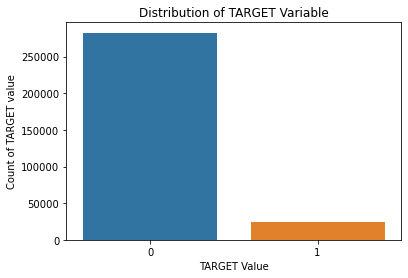

In [69]:
#checking the distribution of target variable
sns.countplot(application_data1['TARGET'])
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET value")
plt.title("Distribution of TARGET Variable")
plt.show()

# Univariate analysis

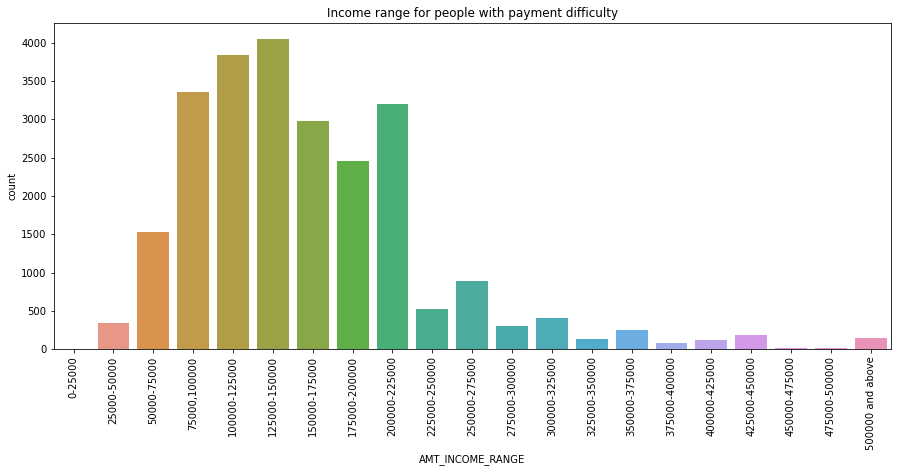

In [70]:
plt.figure(figsize=(15,6)) 
sns.countplot(data=target1_application_data1,x='AMT_INCOME_RANGE').set(title='Income range for people with payment difficulty')
plt.xticks(rotation=90)

plt.show()

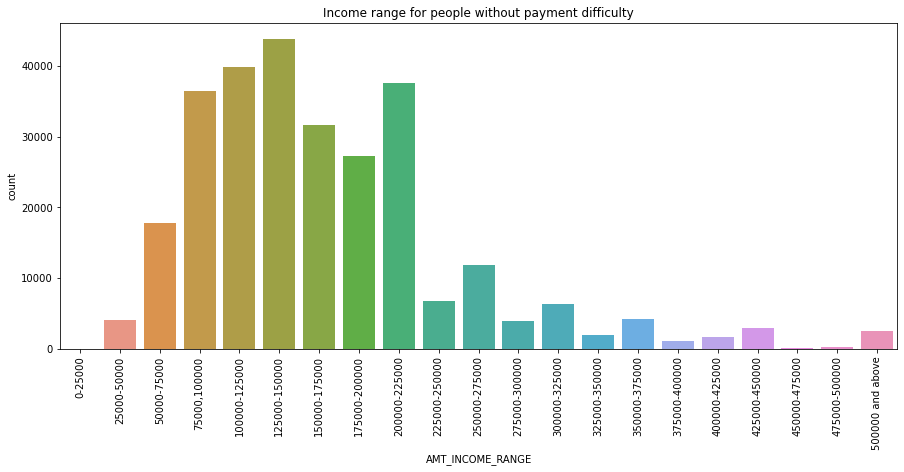

In [71]:
plt.figure(figsize=(15,6)) 
sns.countplot(data=target0_application_data1,x='AMT_INCOME_RANGE').set(title='Income range for people without payment difficulty')
plt.xticks(rotation=90)
plt.show()

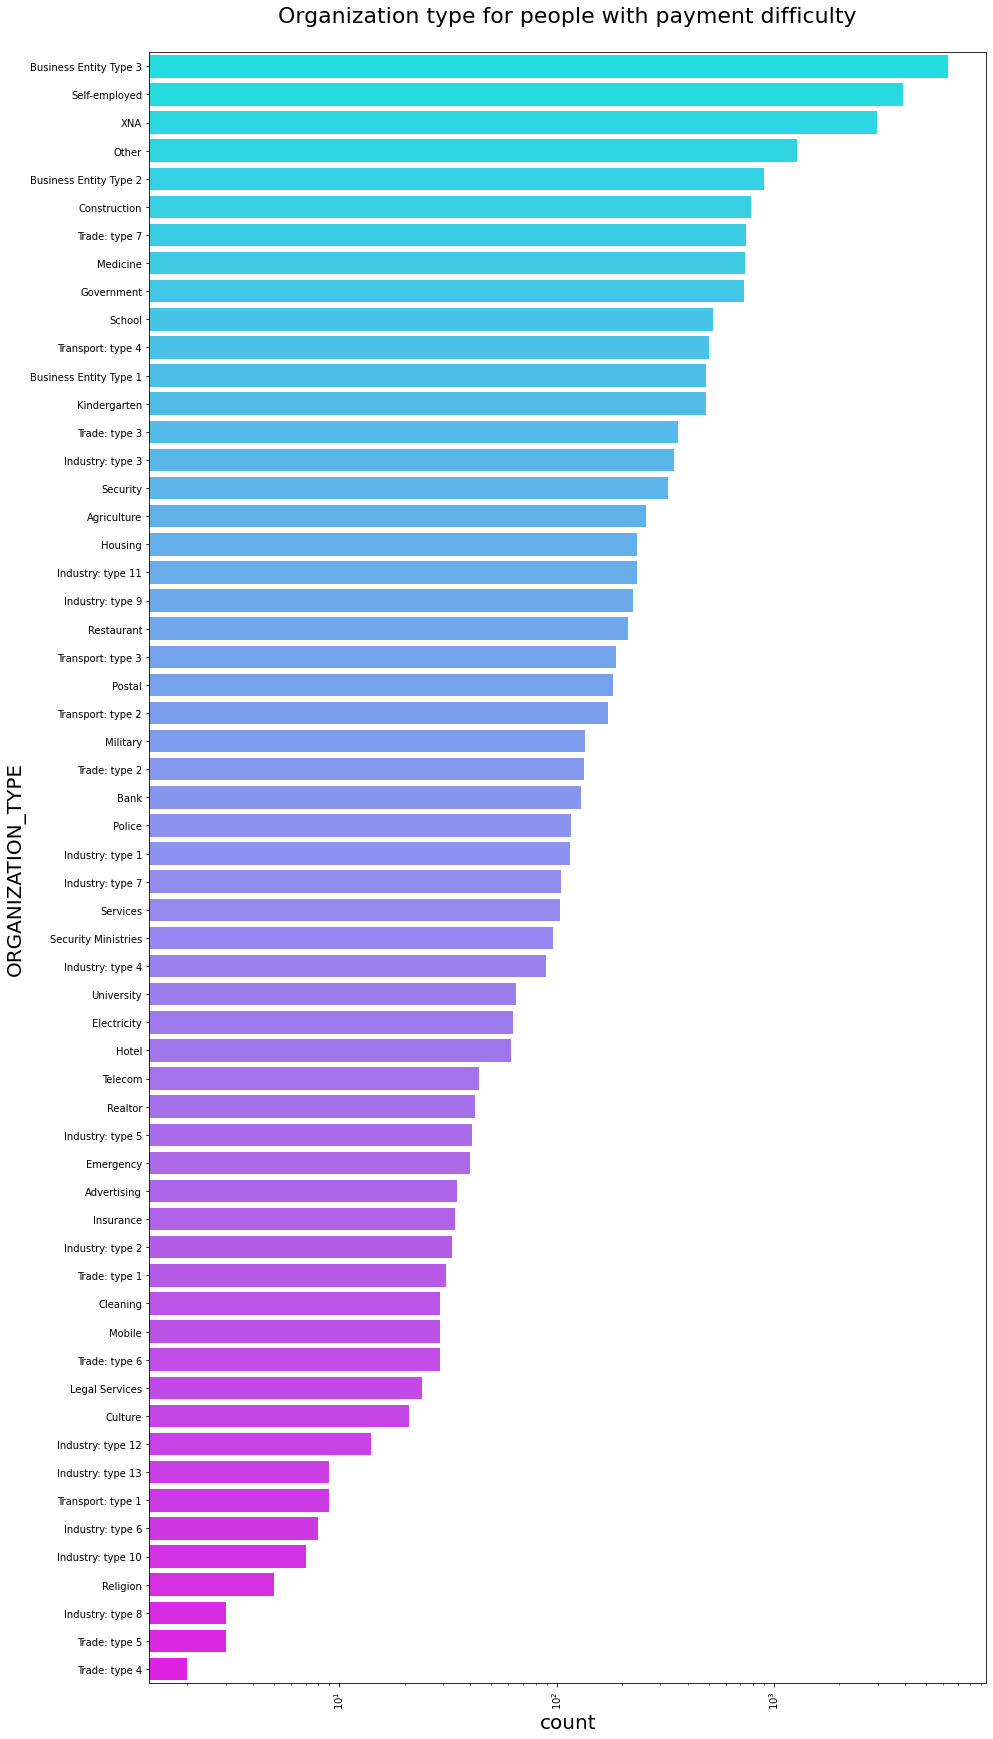

In [72]:

plt.figure(figsize=(15,30))
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30


plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target1_application_data1,y='ORGANIZATION_TYPE',order=target1_application_data1['ORGANIZATION_TYPE'].value_counts().index,palette='cool').set(title= 'Organization type for people with payment difficulty')

plt.show()

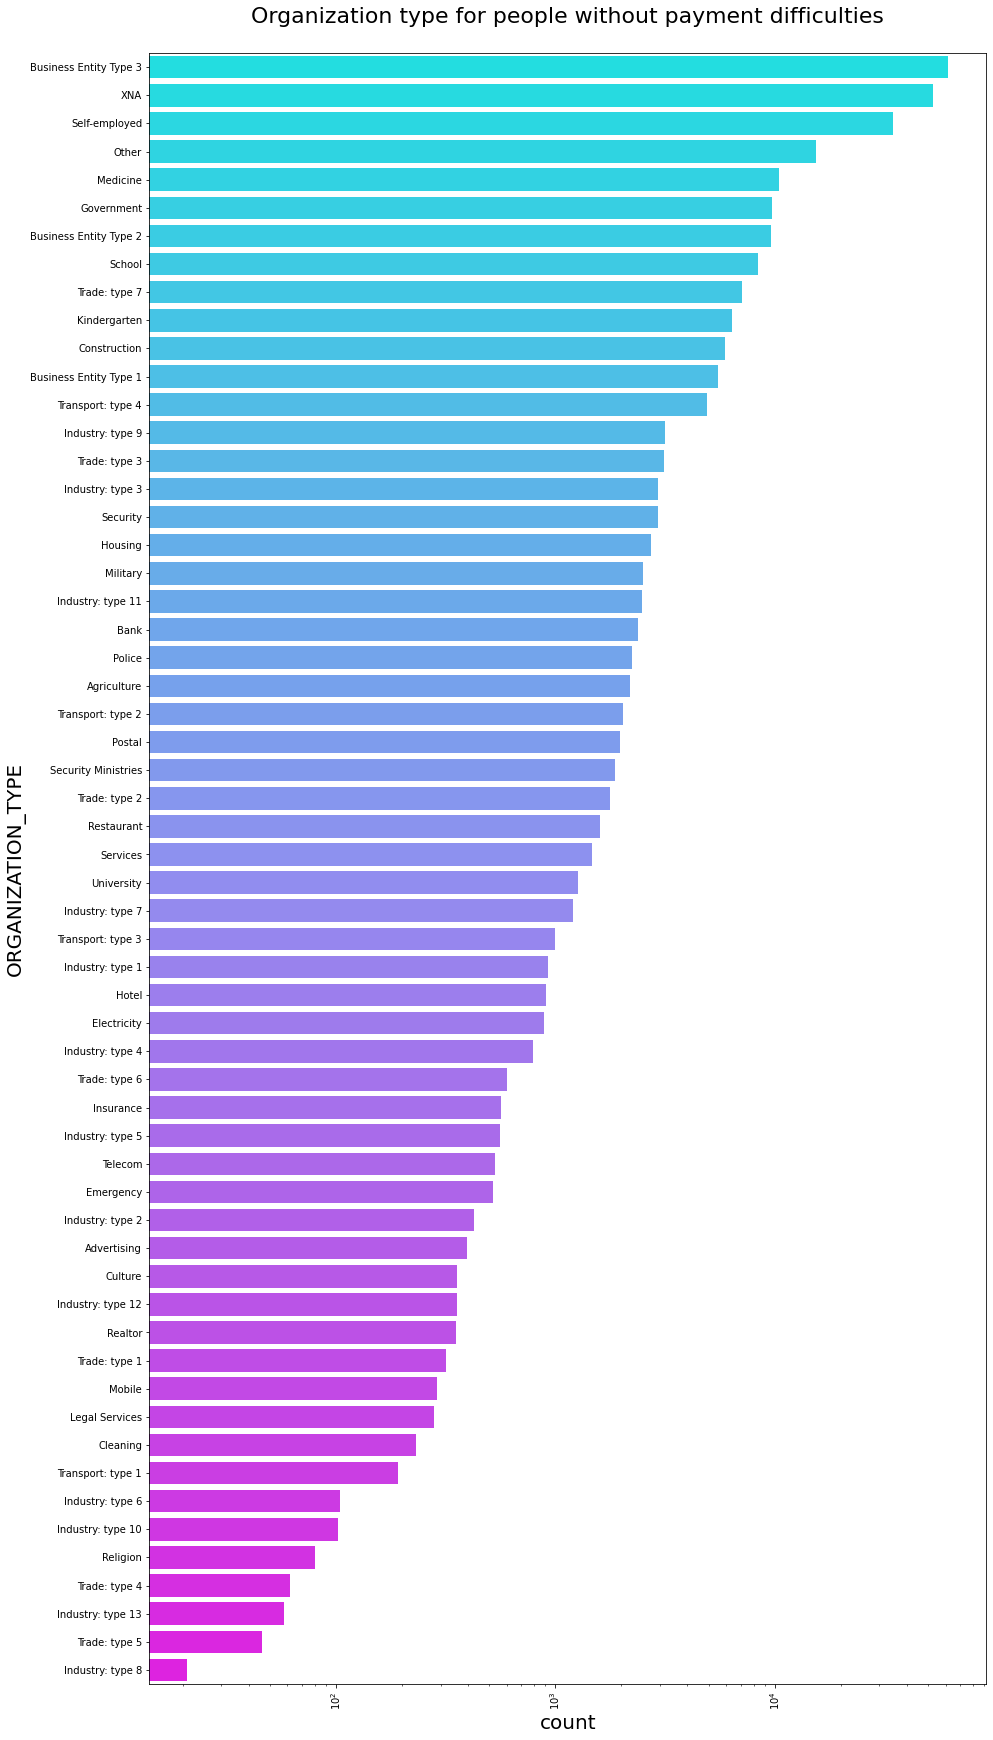

In [73]:

plt.figure(figsize=(15,30))
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30


plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_application_data1,y='ORGANIZATION_TYPE',order=target0_application_data1['ORGANIZATION_TYPE'].value_counts().index,palette='cool').set(title= 'Organization type for people without payment difficulties')

plt.show()

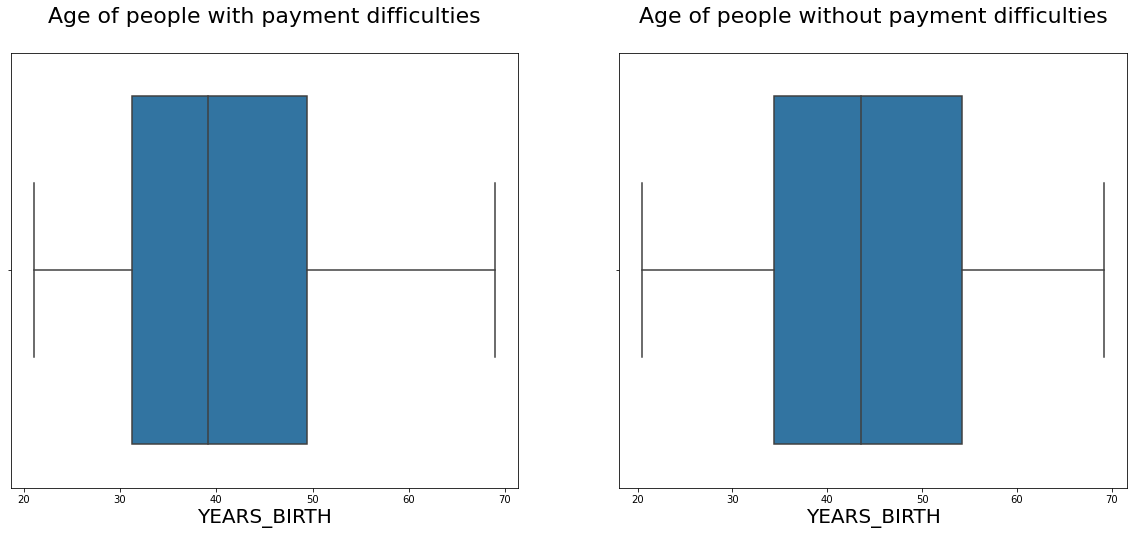

In [74]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(target1_application_data1['YEARS_BIRTH'])
plt.title('Age of people with payment difficulties')

plt.subplot(1,2,2)
ax = sns.boxplot(target0_application_data1['YEARS_BIRTH'])
plt.title('Age of people without payment difficulties')
plt.show()

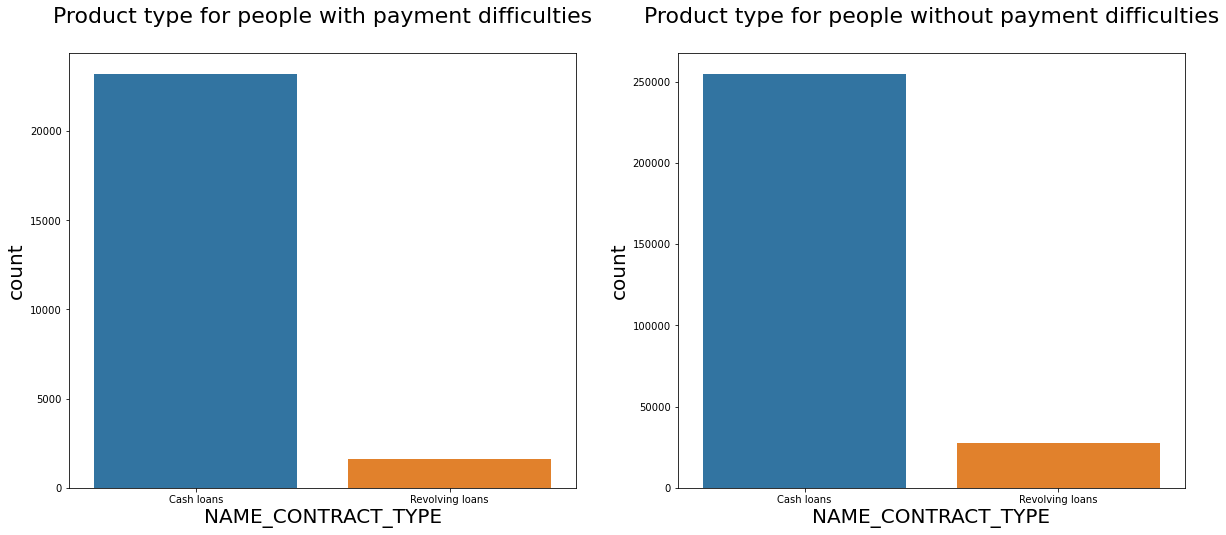

In [75]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(target1_application_data1['NAME_CONTRACT_TYPE'])
plt.title('Product type for people with payment difficulties')

plt.subplot(1,2,2)
ax = sns.countplot(target0_application_data1['NAME_CONTRACT_TYPE'])
plt.title('Product type for people without payment difficulties')

plt.show()


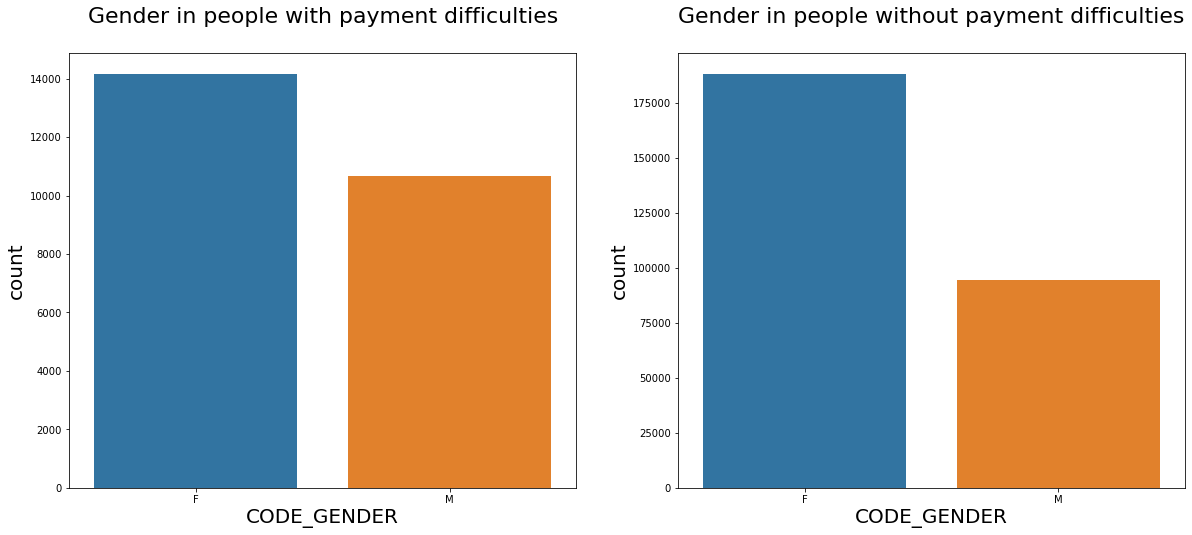

In [76]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(target1_application_data1['CODE_GENDER'])
plt.title('Gender in people with payment difficulties')

plt.subplot(1,2,2)
ax = sns.countplot(target0_application_data1['CODE_GENDER'])
plt.title('Gender in people without payment difficulties')

plt.show()


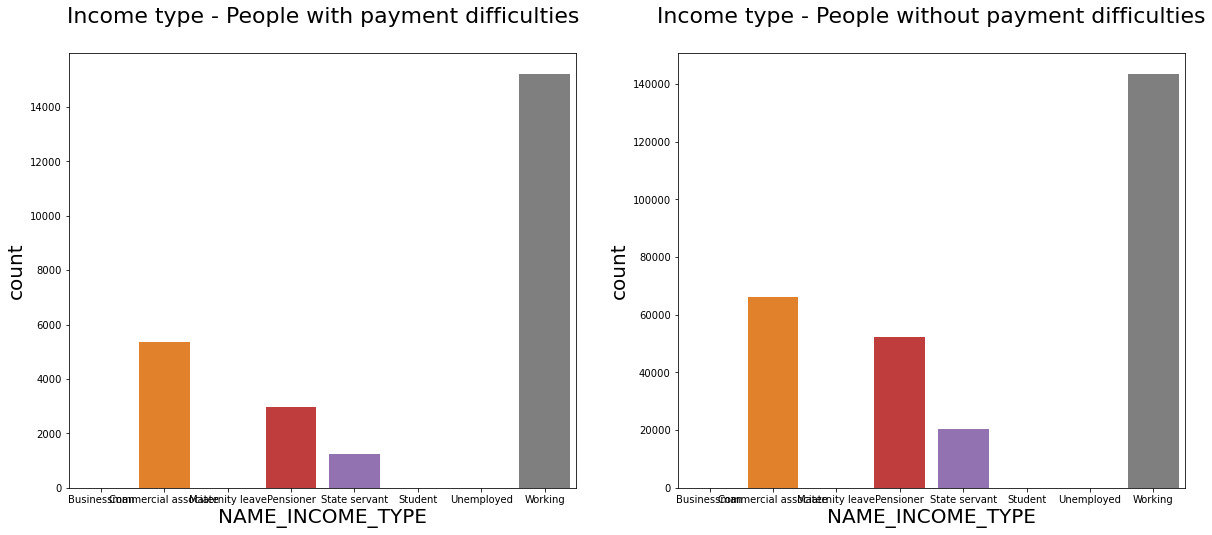

In [77]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(target1_application_data1['NAME_INCOME_TYPE'])
plt.title('Income type - People with payment difficulties')

plt.subplot(1,2,2)
ax = sns.countplot(target0_application_data1['NAME_INCOME_TYPE'])
plt.title('Income type - People without payment difficulties')

plt.show()


# Bivariate Analysis¶

### Numerical-Numerical Bivariate Analysis¶

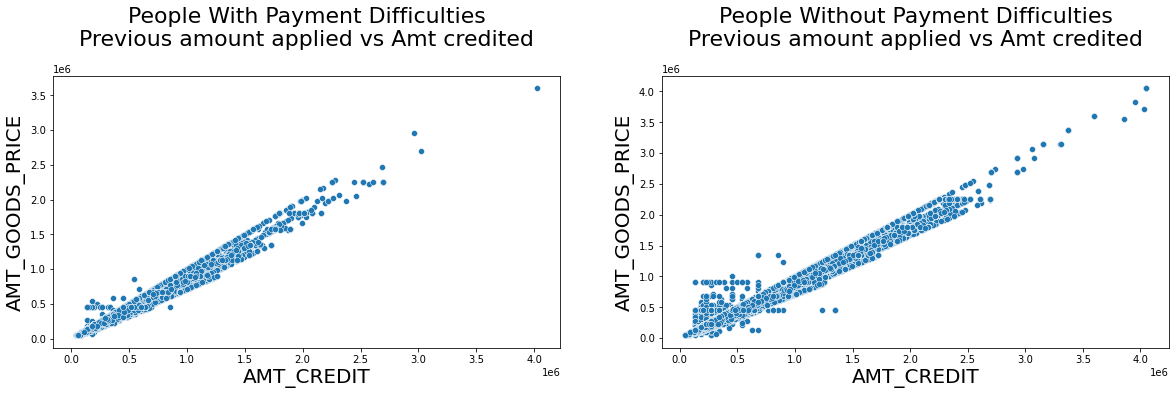

In [78]:
plt.figure(figsize=(20,5)) 

plt.subplot(1,2,1)
ax = sns.scatterplot(data=target1_application_data1,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('''People With Payment Difficulties
Previous amount applied vs Amt credited''')

plt.subplot(1,2,2)
ax = sns.scatterplot(data=target0_application_data1,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('''People Without Payment Difficulties
Previous amount applied vs Amt credited''')


plt.show()


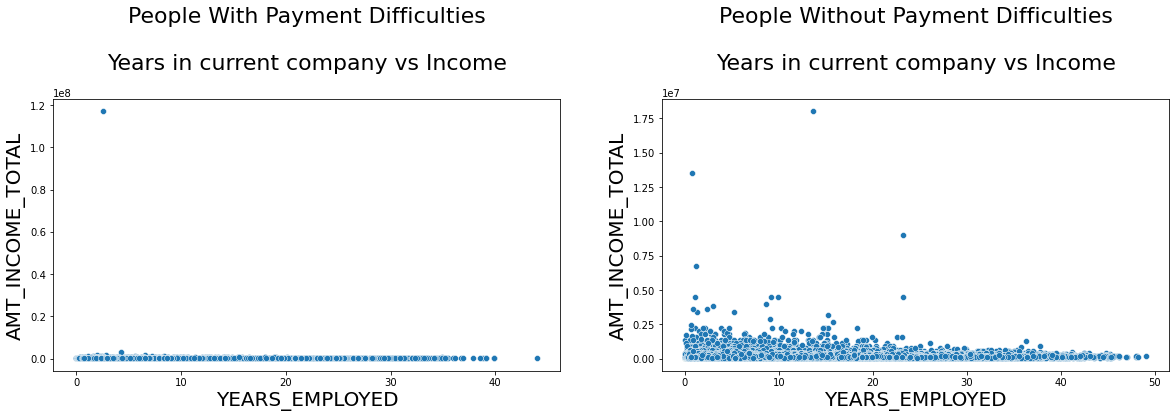

In [79]:
plt.figure(figsize=(20,5)) 

plt.subplot(1,2,1)
ax = sns.scatterplot(data=target1_application_data1[target1_application_data1['YEARS_EMPLOYED']<1000], x='YEARS_EMPLOYED',y='AMT_INCOME_TOTAL') #We used less than 1000 since we know that we have outliers
plt.title('''People With Payment Difficulties

Years in current company vs Income''')

plt.subplot(1,2,2)
ax = sns.scatterplot(data=target0_application_data1[target0_application_data1['YEARS_EMPLOYED']<1000], x='YEARS_EMPLOYED',y='AMT_INCOME_TOTAL')
plt.title('''People Without Payment Difficulties

Years in current company vs Income''')


plt.show()


There is no correlation in the above graph in either case

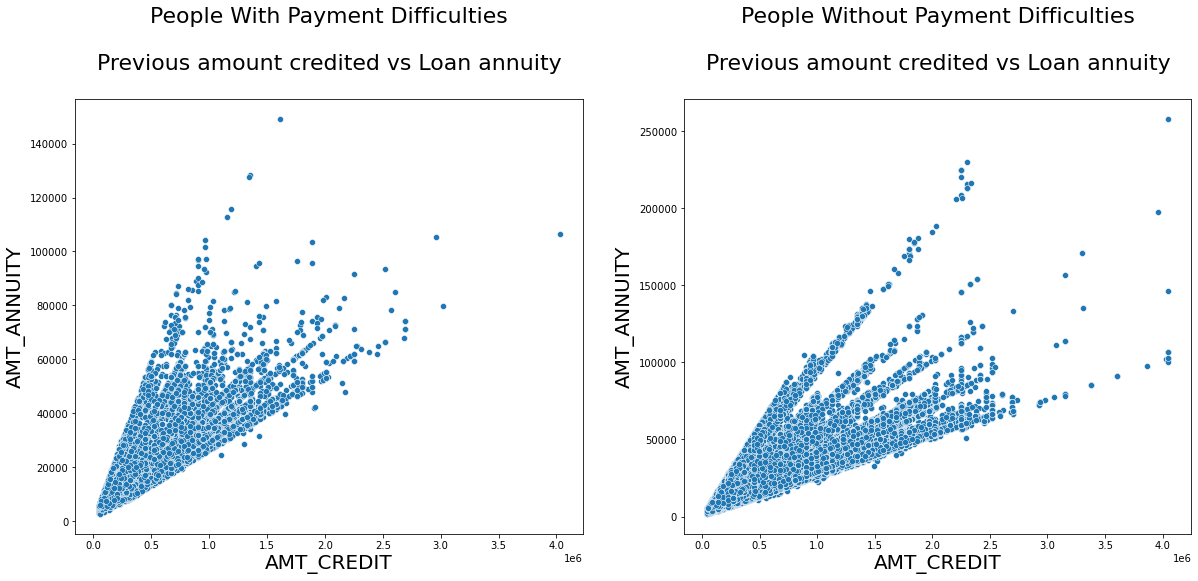

In [80]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.scatterplot(data=target1_application_data1,x='AMT_CREDIT',y='AMT_ANNUITY')
plt.title('''People With Payment Difficulties

Previous amount credited vs Loan annuity''')

plt.subplot(1,2,2)
ax = sns.scatterplot(data=target0_application_data1,x='AMT_CREDIT',y='AMT_ANNUITY')
plt.title('''People Without Payment Difficulties

Previous amount credited vs Loan annuity''')


plt.show()


### Numerical-Categorical Bivariate Analysis

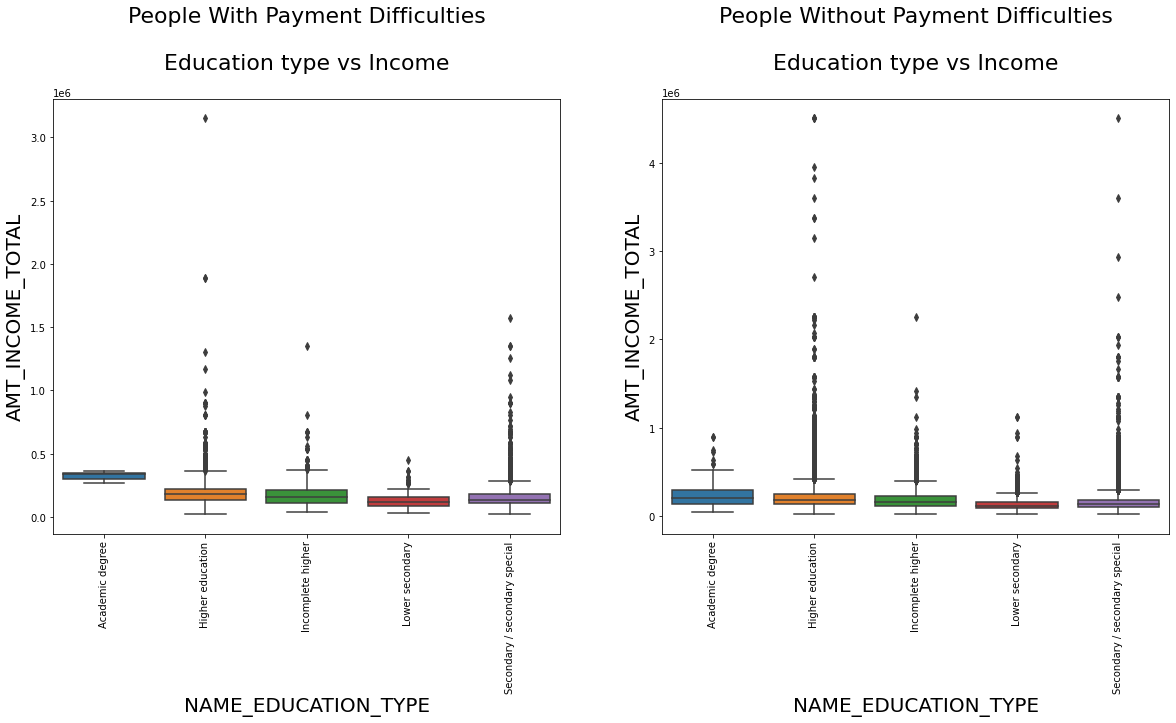

In [81]:
plt.figure(figsize=(20,8)) 
#We know that 'AMT_INCOME_TOTAL' column has outliers so we will check for values under 5000000.
plt.subplot(1,2,1)
ax = sns.boxplot(data=target1_application_data1[target1_application_data1['AMT_INCOME_TOTAL']<5000000],x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL')
plt.title('''People With Payment Difficulties

Education type vs Income''')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=target0_application_data1[target0_application_data1['AMT_INCOME_TOTAL']<5000000],x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL')
plt.title('''People Without Payment Difficulties

Education type vs Income''')
plt.xticks(rotation=90)

plt.show()


plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=target1_application_data1,x='OCCUPATION_TYPE', y='AMT_CREDIT')
plt.title('''People With Payment Difficulties

Occupation type vs Amt credited''')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=target0_application_data1,x='OCCUPATION_TYPE', y='AMT_CREDIT')
plt.title('''People Without Payment Difficulties

Occupation type vs Amt credited''')
plt.xticks(rotation=90)

plt.show()


### Categorical-Categorical Bivariate Analysis

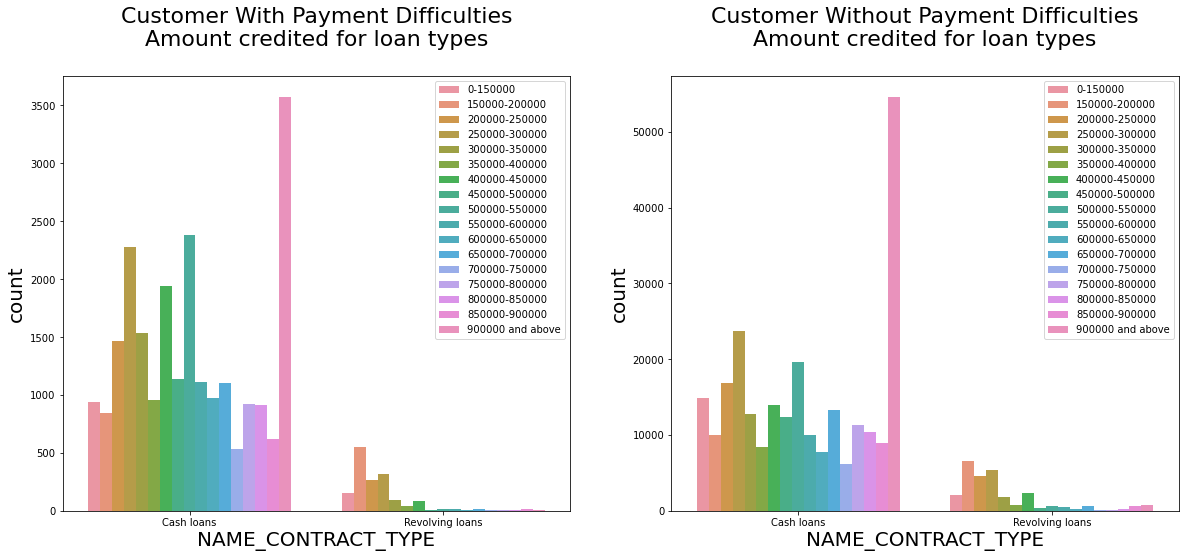

In [84]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(data=target1_application_data1,x='NAME_CONTRACT_TYPE',hue='AMT_CREDIT_RANGE')
plt.title('''Customer With Payment Difficulties
Amount credited for loan types''')
plt.legend(loc='upper right')


plt.subplot(1,2,2)
ax = sns.countplot(data=target0_application_data1,x='NAME_CONTRACT_TYPE',hue='AMT_CREDIT_RANGE')
plt.title('''Customer Without Payment Difficulties
Amount credited for loan types''')
plt.legend(loc='upper right')
plt.show()


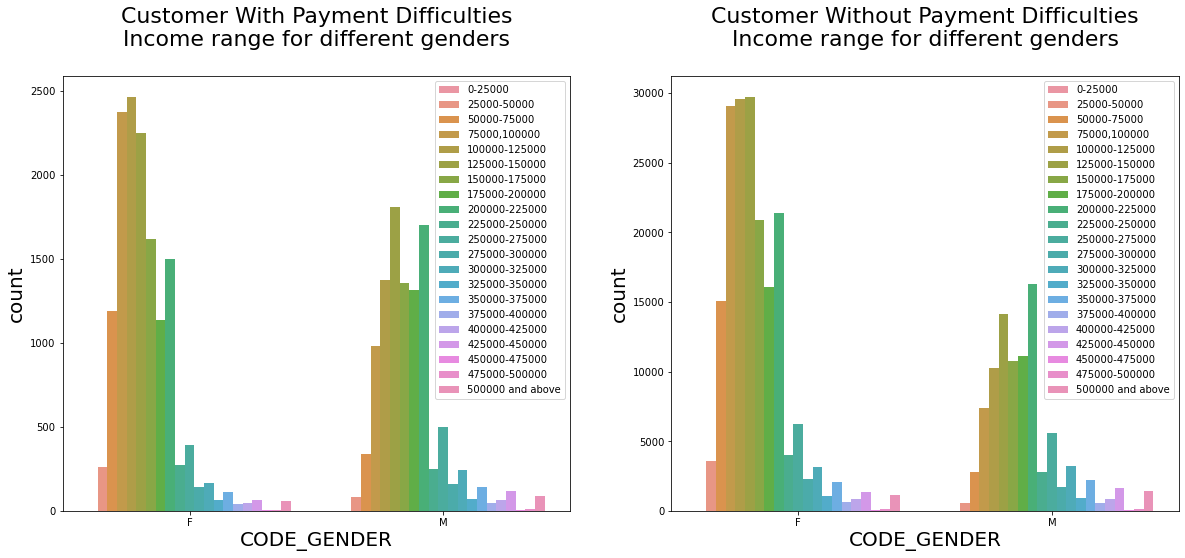

In [86]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(data=target1_application_data1,x='CODE_GENDER',hue='AMT_INCOME_RANGE')
plt.title('''Customer With Payment Difficulties
Income range for different genders''')
plt.legend(loc='upper right')


plt.subplot(1,2,2)
ax = sns.countplot(data=target0_application_data1,x='CODE_GENDER',hue='AMT_INCOME_RANGE')
plt.title('''Customer Without Payment Difficulties
Income range for different genders''')
plt.legend(loc='upper right')
plt.show()

## Correlation between different variables in both cases

#### For people finding it difficult to pay, i.e., Target 1

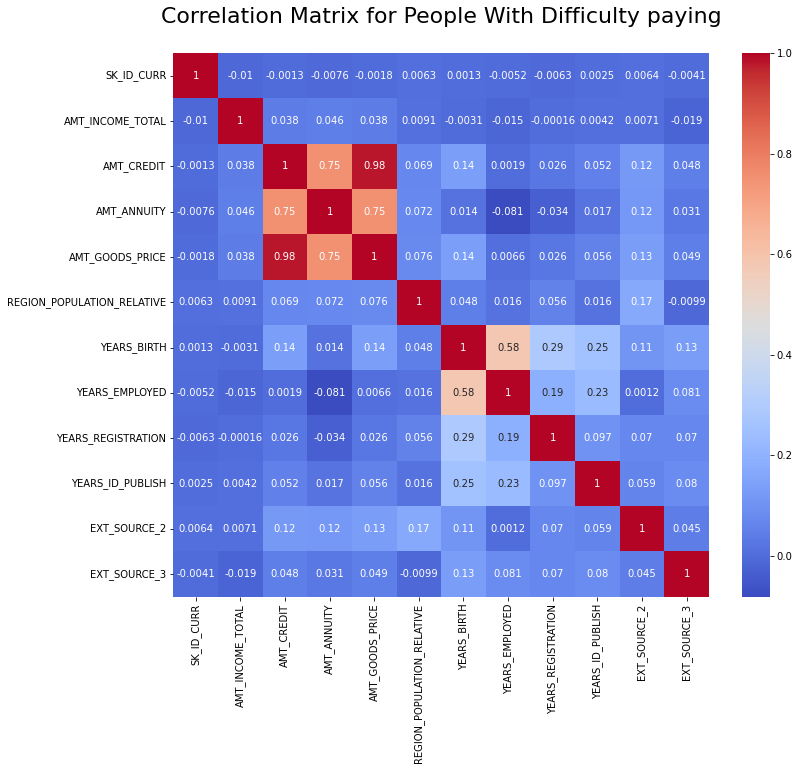

In [91]:
plt.figure(figsize=(12,10)) 
sns.heatmap(target1_application_data1.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix for People With Difficulty paying')
plt.show()

In [93]:
# now we need to find top 10 correlations
corr0 = target1_application_data1.corr()
corr_df0 = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool))
corr_df0 = corr_df0.unstack().reset_index().dropna(subset = [0])
corr_df0.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df0['Corr_abs'] = abs(corr_df0['Correlation_Value'])
corr_df0.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df0.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
50,AMT_GOODS_PRICE,AMT_CREDIT,0.982783,0.982783
51,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295,0.752295
38,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
90,YEARS_EMPLOYED,YEARS_BIRTH,0.582185,0.582185
102,YEARS_REGISTRATION,YEARS_BIRTH,0.289114,0.289114
114,YEARS_ID_PUBLISH,YEARS_BIRTH,0.252863,0.252863
115,YEARS_ID_PUBLISH,YEARS_EMPLOYED,0.229090,0.229090
103,YEARS_REGISTRATION,YEARS_EMPLOYED,0.192455,0.192455
125,EXT_SOURCE_2,REGION_POPULATION_RELATIVE,0.169839,0.169839
76,YEARS_BIRTH,AMT_GOODS_PRICE,0.135738,0.135738


#### For people not finding it difficult to pay, i.e., Target 0

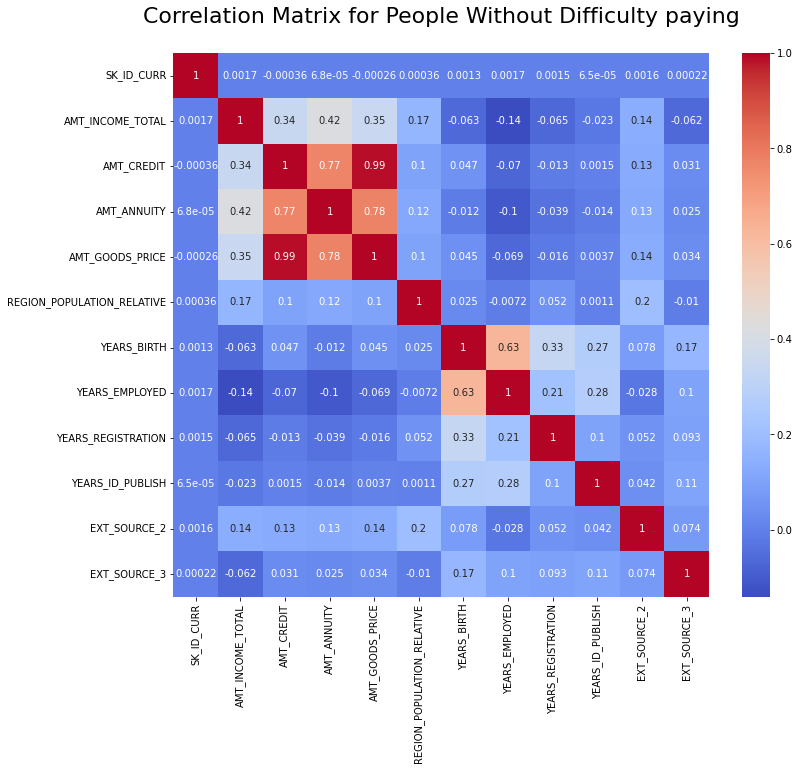

In [92]:
plt.figure(figsize=(12,10)) 
sns.heatmap(target0_application_data1.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix for People Without Difficulty paying')
plt.show()

In [94]:
# now we need to find top 10 correlations
corr0 = target0_application_data1.corr()
corr_df0 = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool))
corr_df0 = corr_df0.unstack().reset_index().dropna(subset = [0])
corr_df0.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df0['Corr_abs'] = abs(corr_df0['Correlation_Value'])
corr_df0.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df0.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
50,AMT_GOODS_PRICE,AMT_CREDIT,0.987022,0.987022
51,AMT_GOODS_PRICE,AMT_ANNUITY,0.776433,0.776433
38,AMT_ANNUITY,AMT_CREDIT,0.771309,0.771309
90,YEARS_EMPLOYED,YEARS_BIRTH,0.626121,0.626121
37,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953,0.418953
49,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349421,0.349421
25,AMT_CREDIT,AMT_INCOME_TOTAL,0.342793,0.342793
102,YEARS_REGISTRATION,YEARS_BIRTH,0.333161,0.333161
115,YEARS_ID_PUBLISH,YEARS_EMPLOYED,0.276666,0.276666
114,YEARS_ID_PUBLISH,YEARS_BIRTH,0.271312,0.271312


We can see that the top 4 correlations for both the targets are same

# Now let's move to the second dataset that we were given

In [96]:
# we had already loaded the application dataframe, let's read it
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
previous_application.shape

(1670214, 37)

In [98]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [100]:
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [110]:
null_pc1 = previous_application.isnull().sum()*100/len(previous_application)
major_missing_columns1 = null_pc1[null_pc1 >=40]
major_missing_columns1

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [112]:
major_missing_columns1.shape

(11,)

In [113]:
# You can see that there are 11 columns, let's drop them

In [114]:
previous_application1 = previous_application.drop(columns=major_missing_columns1.index)

In [115]:
previous_application1.shape

(1670214, 26)

In [116]:
#So, we are left with 26 columns. Let's look at them

In [119]:
previous_application1.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.605408e+01
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


In [120]:
previous_application1.DAYS_DECISION.value_counts()

-245     2444
-238     2390
-210     2375
-273     2350
-196     2315
         ... 
-2882     163
-2922     162
-2921     158
-2902     148
-1          2
Name: DAYS_DECISION, Length: 2922, dtype: int64

In [121]:
previous_application1.DAYS_DECISION.describe()

count    1.670214e+06
mean    -8.806797e+02
std      7.790997e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64

Let's change them to positive values

In [122]:
previous_application1.DAYS_DECISION = previous_application1.DAYS_DECISION.abs()

##### Now, let's check for na values again

In [160]:
previous_application1.isna().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [167]:
## there are 346 na values in 'PRODUCT_COMBINATION'. Let's drop those rows

In [169]:
previous_application1 = previous_application1[-previous_application1.PRODUCT_COMBINATION.isnull()]

In [170]:
previous_application1.isna().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    371889
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385169
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    371884
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION                 0
dtype: int64

In [173]:
## There's 1 row where AMT_CREDIT is NA, let's drop that

In [174]:
previous_application1 = previous_application1[-previous_application1.AMT_CREDIT.isnull()]

In [175]:
previous_application1.isna().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    371889
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_GOODS_PRICE                385168
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    371884
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION                 0
dtype: int64

In [176]:
previous_application1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1669867 non-null  int64  
 1   SK_ID_CURR                   1669867 non-null  int64  
 2   NAME_CONTRACT_TYPE           1669867 non-null  object 
 3   AMT_ANNUITY                  1297978 non-null  float64
 4   AMT_APPLICATION              1669867 non-null  float64
 5   AMT_CREDIT                   1669867 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1669867 non-null  object 
 8   HOUR_APPR_PROCESS_START      1669867 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1669867 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1669867 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1669867 non-null  object 
 12  NAME_CONTRACT_STATUS         1669867 non-n

In [178]:
# Let's change ojbect datatype into category type

In [179]:
categorical_columnsprev = 'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE','CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'

In [180]:
#change datatype
for col in categorical_columnsprev:
    previous_application1[col] = previous_application1[col].astype('category')

In [181]:
previous_application1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1669867 non-null  int64   
 1   SK_ID_CURR                   1669867 non-null  int64   
 2   NAME_CONTRACT_TYPE           1669867 non-null  category
 3   AMT_ANNUITY                  1297978 non-null  float64 
 4   AMT_APPLICATION              1669867 non-null  float64 
 5   AMT_CREDIT                   1669867 non-null  float64 
 6   AMT_GOODS_PRICE              1284699 non-null  float64 
 7   WEEKDAY_APPR_PROCESS_START   1669867 non-null  category
 8   HOUR_APPR_PROCESS_START      1669867 non-null  int64   
 9   FLAG_LAST_APPL_PER_CONTRACT  1669867 non-null  category
 10  NFLAG_LAST_APPL_IN_DAY       1669867 non-null  int64   
 11  NAME_CASH_LOAN_PURPOSE       1669867 non-null  category
 12  NAME_CONTRACT_STATUS        

In [185]:
## We saw earlier that 'NAME_CASH_LOAN_PURPOSE' column had XNP values. Let's check this column

In [186]:
previous_application1.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)

XAP                                 0.552328
XNA                                 0.405971
Repairs                             0.014232
Other                               0.009347
Urgent needs                        0.005038
Buying a used car                   0.001729
Building a house or an annex        0.001613
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000449
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                     0.000081
Hobby     

# Let's merge the two dataframe now

##### We are merging the cleaned verseions of both the dataframes

In [192]:
Bothdata = pd.merge(left=application_data1, right=previous_application1, how='inner', on='SK_ID_CURR', suffixes='_x')

In [194]:
Bothdata.shape

(1413294, 68)

In [195]:
Bothdata.describe()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,...,SK_ID_PREV,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_GOODS_PRICEx,HOUR_APPR_PROCESS_STARTx,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.413294e+06,1.413294e+06,1.413294e+06,1.413294e+06,1.413294e+06,1.413294e+06,1.413294e+06,1.413294e+06,1.413294e+06,1.413294e+06,...,1.413294e+06,1.106419e+06,1.413294e+06,1.413294e+06,1.094114e+06,1.413294e+06,1.413294e+06,1.413294e+06,1.413294e+06,1.106424e+06
mean,2.784857e+05,1.733175e+05,5.875770e+05,2.701756e+04,5.276747e+05,2.074905e-02,4.471640e+01,1.991189e+02,1.370838e+01,8.314011e+00,...,1.922744e+06,1.583728e+04,1.752855e+05,1.964009e+05,2.264530e+05,1.247887e+01,9.964310e-01,8.804767e+02,3.150523e+02,1.605206e+01
std,1.028128e+05,1.985970e+05,3.849260e+05,1.395149e+04,3.531113e+05,1.334684e-02,1.190310e+01,3.927365e+02,9.728996e+00,4.129824e+00,...,5.327154e+05,1.472506e+04,2.936471e+05,3.195076e+05,3.159410e+05,3.331546e+00,5.963415e-02,7.835931e+02,7.696186e+03,1.456677e+01
min,1.000020e+05,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,2.051781e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,1.893710e+05,1.125000e+05,2.700000e+05,1.682100e+04,2.385000e+05,1.003200e-02,3.490137e+01,2.854795e+00,5.482192e+00,4.884932e+00,...,1.461346e+06,6.257880e+03,1.975500e+04,2.491200e+04,4.982850e+04,1.000000e+01,1.000000e+00,2.710000e+02,-1.000000e+00,6.000000e+00
50%,2.790060e+05,1.575000e+05,5.084955e+05,2.493000e+04,4.500000e+05,1.885000e-02,4.395890e+01,6.578082e+00,1.235068e+01,9.123288e+00,...,1.922704e+06,1.122376e+04,7.090650e+04,8.064000e+04,1.102455e+05,1.200000e+01,1.000000e+00,5.820000e+02,4.000000e+00,1.200000e+01
75%,3.675610e+05,2.070000e+05,8.079840e+05,3.454200e+04,6.795000e+05,2.866300e-02,5.473973e+01,1.729863e+01,2.057808e+01,1.183288e+01,...,2.384015e+06,2.042145e+04,1.800000e+05,2.156400e+05,2.295000e+05,1.500000e+01,1.000000e+00,1.314000e+03,8.500000e+01,2.400000e+01
max,4.562550e+05,1.170000e+08,4.050000e+06,2.250000e+05,4.050000e+06,7.250800e-02,6.904384e+01,1.000666e+03,6.759452e+01,1.971781e+01,...,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,5.850000e+06,2.300000e+01,1.000000e+00,2.922000e+03,4.000000e+06,8.400000e+01


In [196]:
Bothdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [197]:
Bothdata.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_', 'AMT_ANNUITY_', 'AMT_GOODS_PRICE_', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH',
       'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_',
       'HOUR_APPR_PROCESS_START_', 'REG_REGION_NOT_LIVE_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'A

#### Let's create 4 different dataframes based on the 4 contract status

In [202]:
approved = Bothdata[Bothdata['NAME_CONTRACT_STATUS']=='Approved']
refused = Bothdata[Bothdata['NAME_CONTRACT_STATUS']=='Refused']
canceled = Bothdata[Bothdata['NAME_CONTRACT_STATUS']=='Canceled']
unused = Bothdata[Bothdata['NAME_CONTRACT_STATUS']=='Unused offer']

#### Let's define a function to create subplots so that we don't have to write the codes again and again

In [254]:
def plots(variable_name):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(15,12), sharey='all')
    fig.tight_layout(pad=10.0)

    ax1 = sns.countplot(ax=ax1,data=approved,x=variable_name)
    ax1.set_title("Approved", fontsize=20)
    ax1.set_ylabel("Number of Loans")
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)


    ax2 = sns.countplot(ax=ax2,data=refused,x=variable_name)
    ax2.set_title("Refused", fontsize=20)
    ax2.set_xticklabels(ax1.get_xticklabels(),rotation=90)


    ax3 = sns.countplot(ax=ax3,data=canceled,x=variable_name)
    ax3.set_title("Canceled", fontsize=20)
    ax3.set_xlabel(variable_name)
    ax3.set_ylabel("Number of Loans")
    ax3.set_xticklabels(ax1.get_xticklabels(),rotation=90)

    ax4 = sns.countplot(ax=ax4,data=unused,x=variable_name)
    ax4.set_title("Unused", fontsize=20)
    ax4.set_xlabel(variable_name)
    ax4.set_xticklabels(ax1.get_xticklabels(),rotation=90)

    
    plt.show()

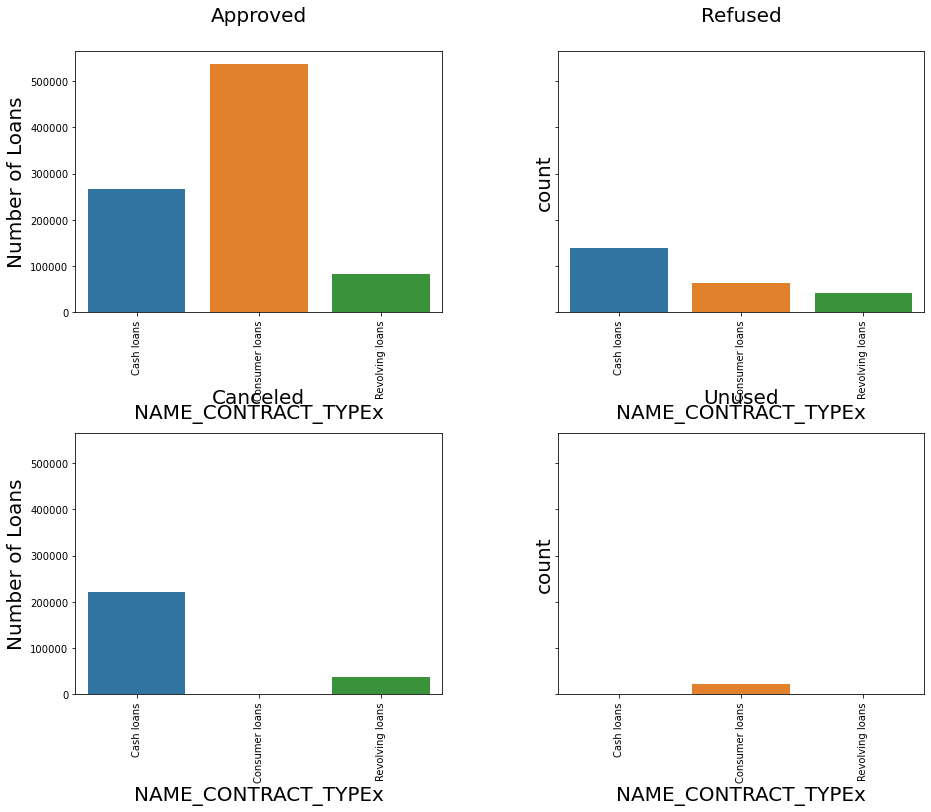

In [255]:
plots('NAME_CONTRACT_TYPEx')

##### We can see that the consumer loans are most likely to be approved and are the most unused too while cash loans are the most refused and canceled.

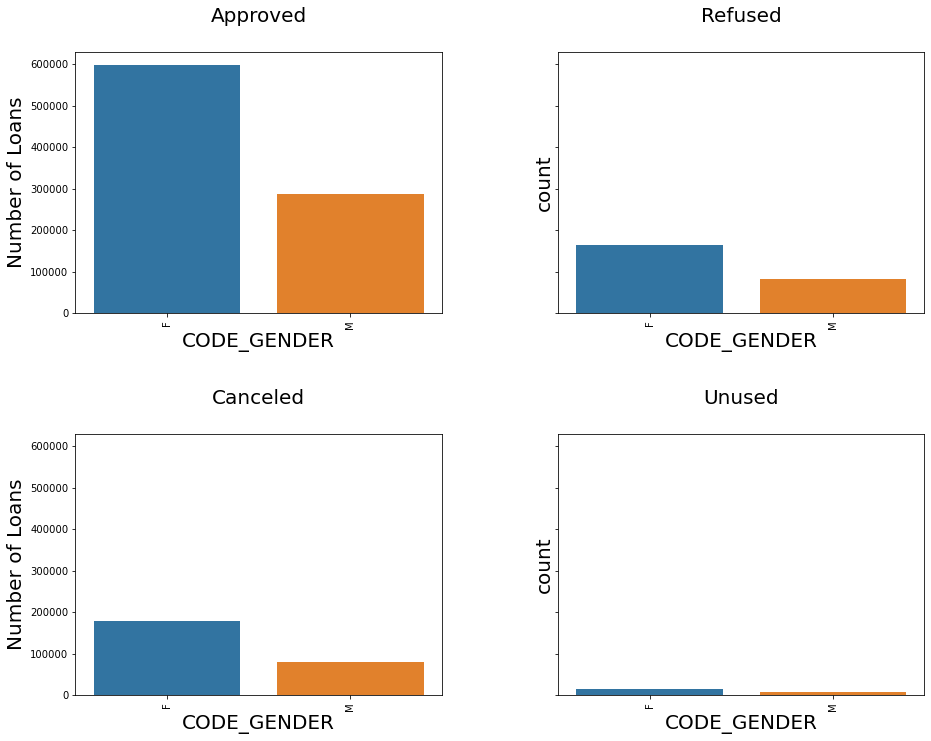

In [256]:
plots('CODE_GENDER')

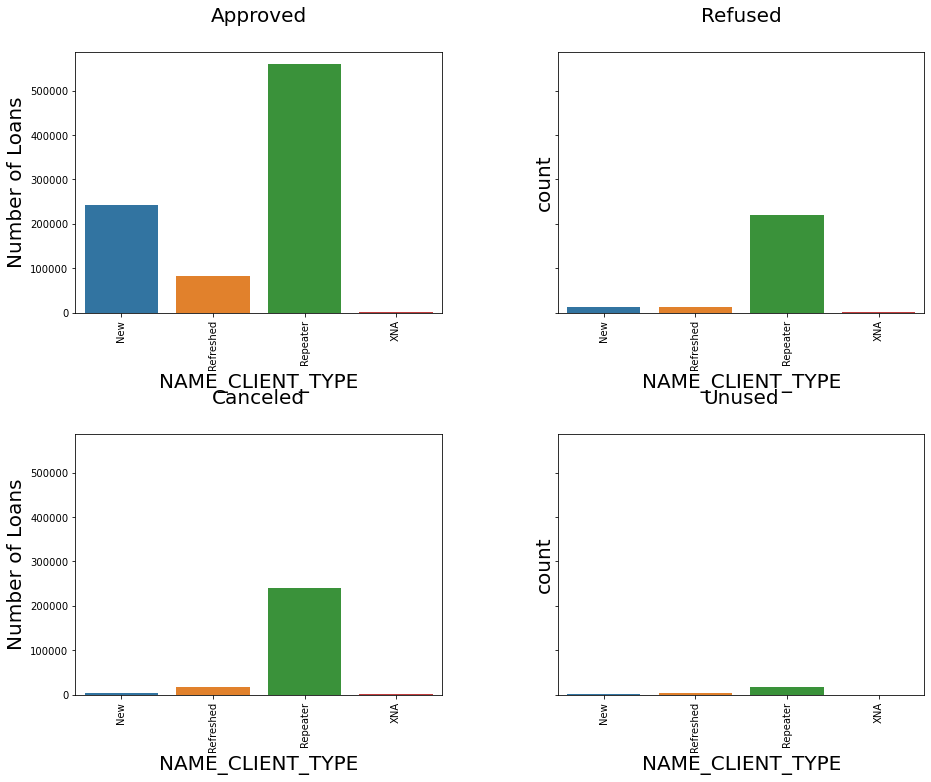

In [257]:
plots('NAME_CLIENT_TYPE')

###### While repeaters dominate all the 4 cases. New clients have more chances of getting approvals than refreshed and refreshed have more chances of gettinf cancelled than new

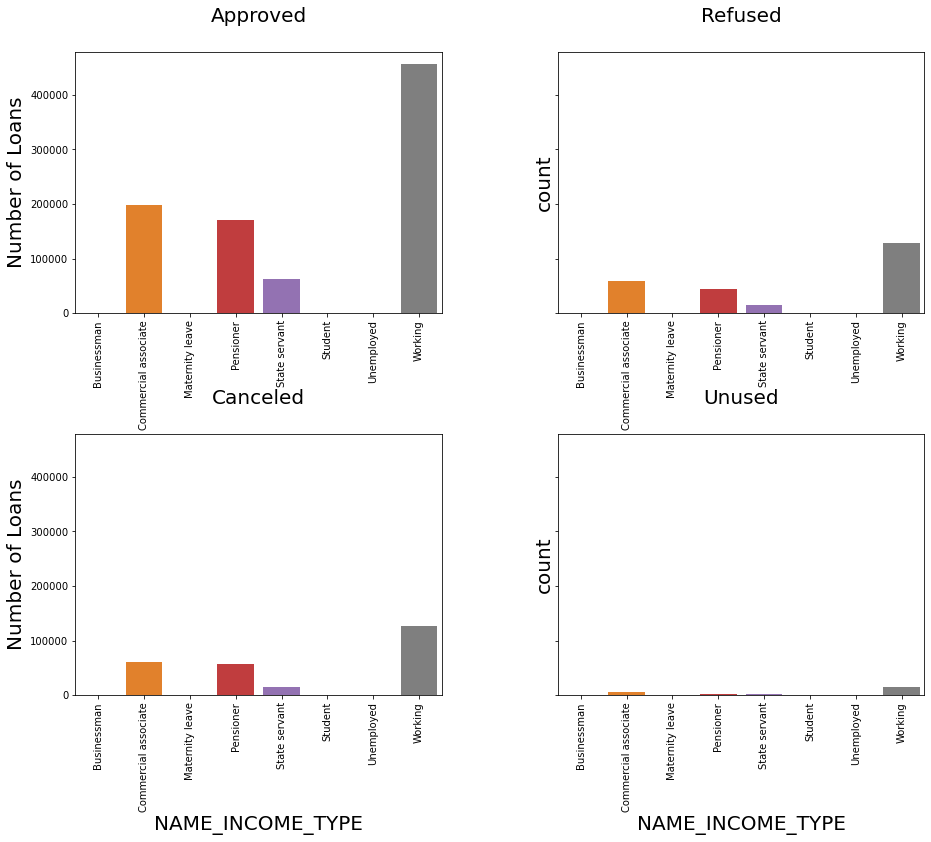

In [258]:
plots('NAME_INCOME_TYPE')

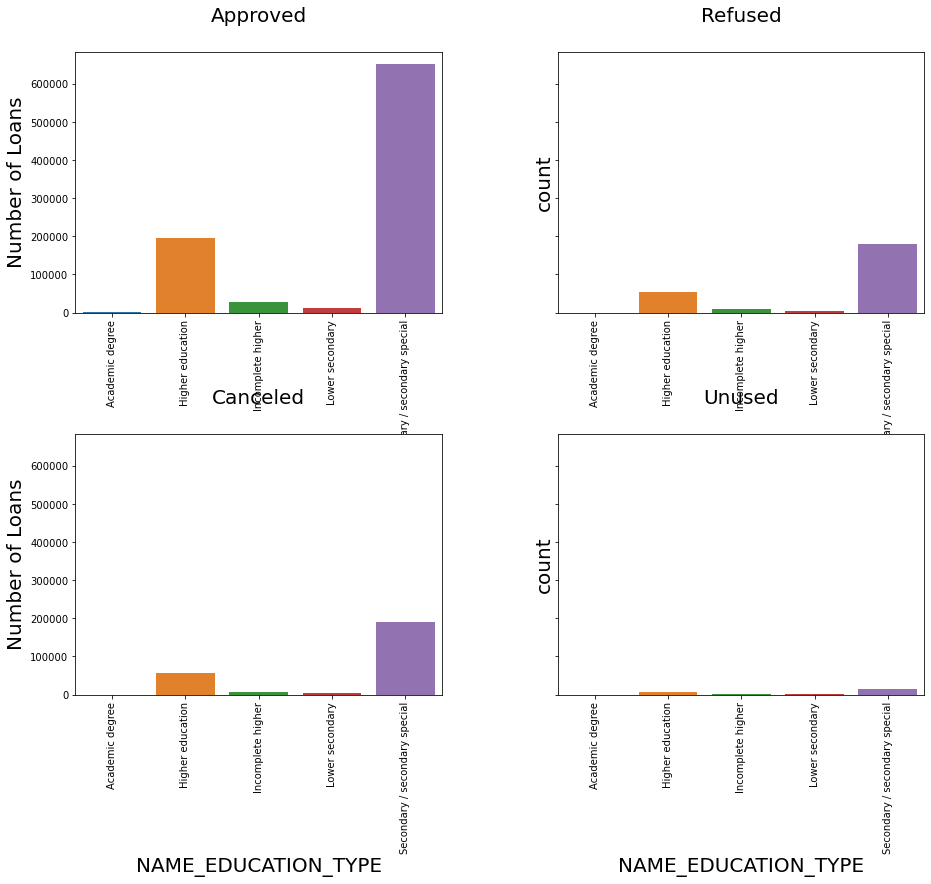

In [259]:
plots ('NAME_EDUCATION_TYPE')

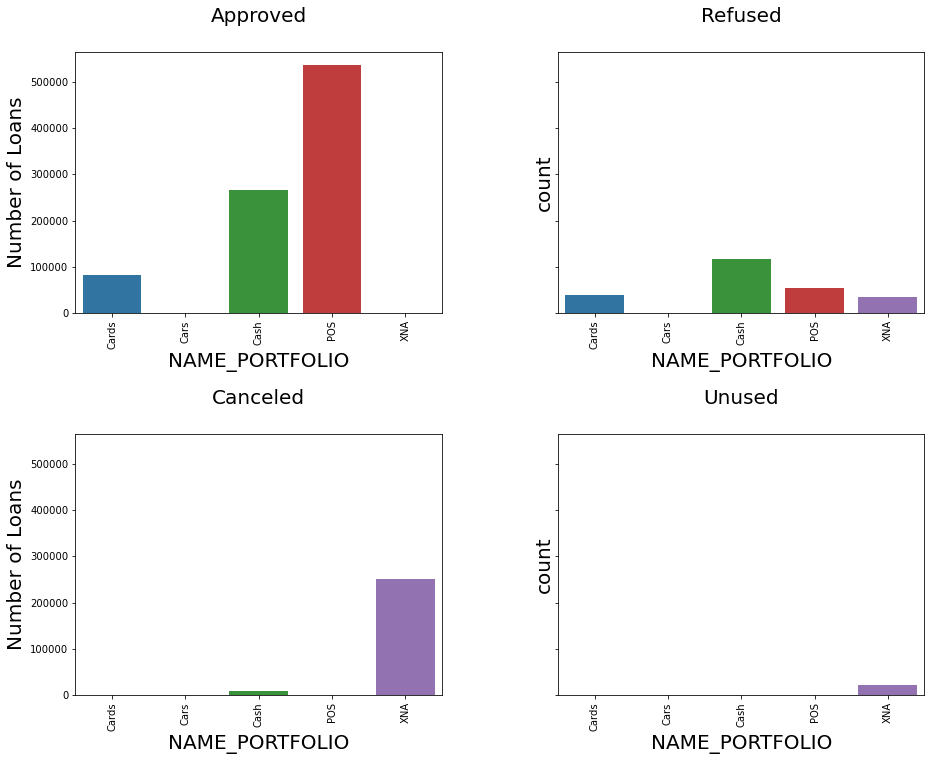

In [262]:
plots('NAME_PORTFOLIO')

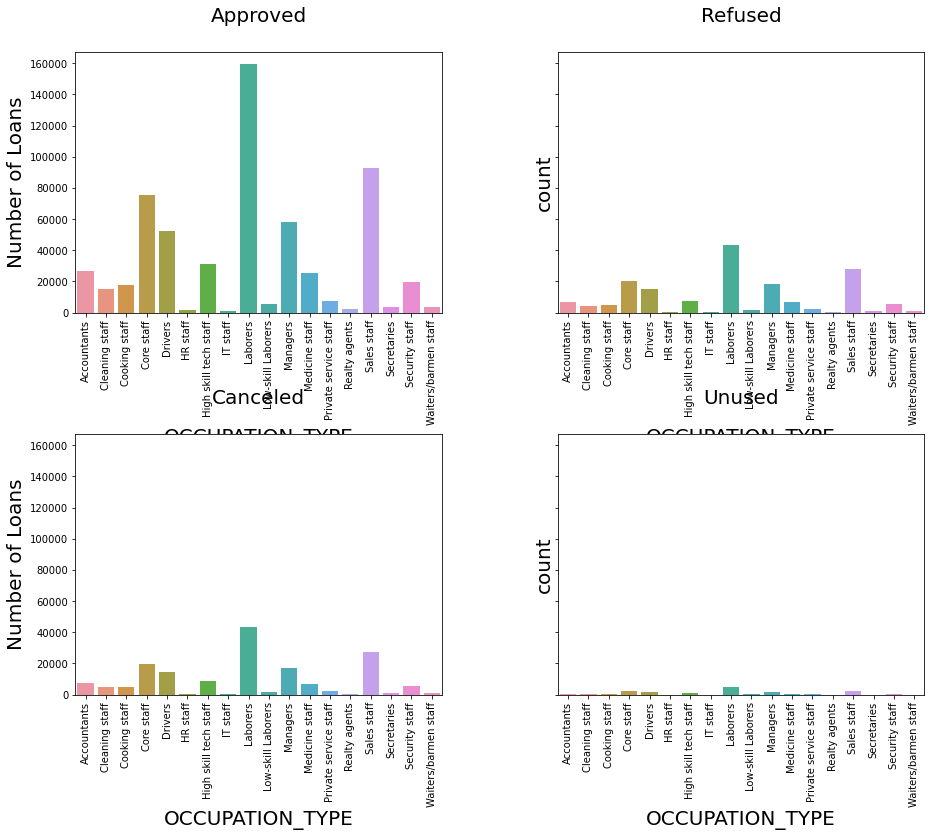

In [263]:
plots('OCCUPATION_TYPE')

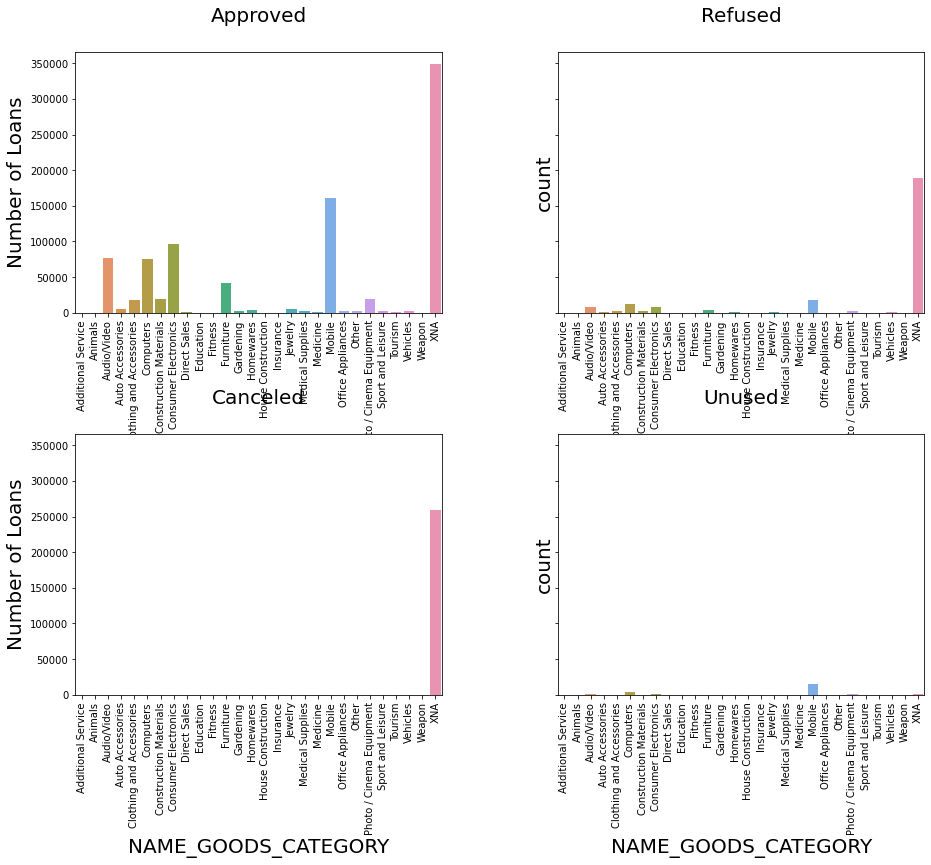

In [266]:
plots('NAME_GOODS_CATEGORY')

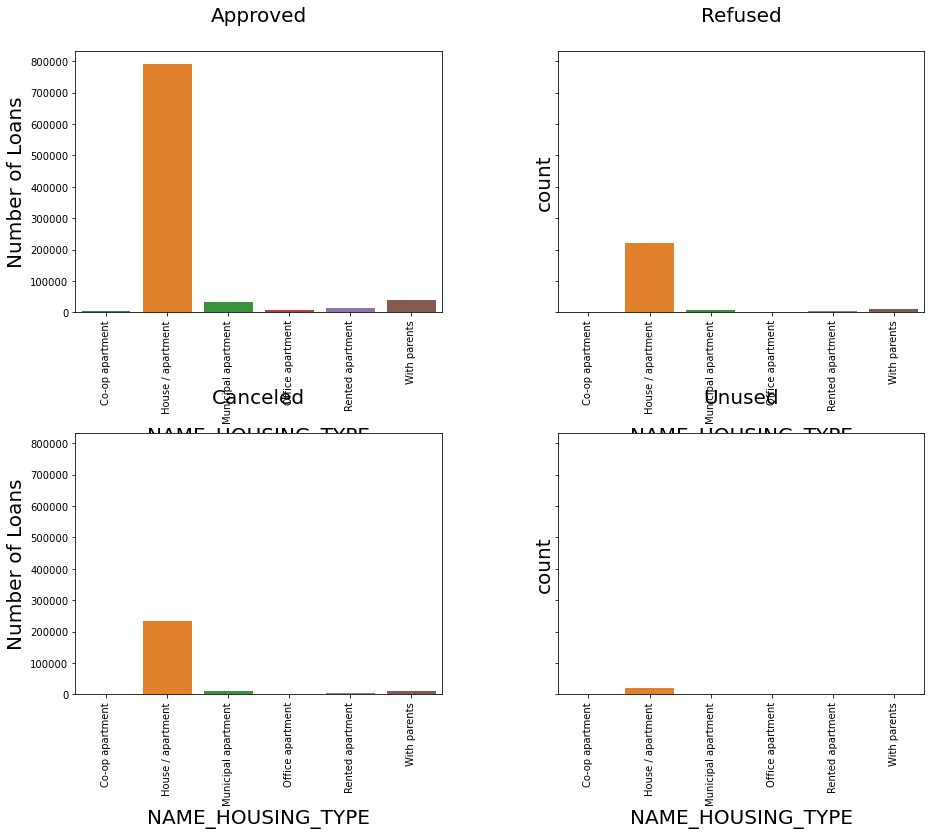

In [268]:
plots('NAME_HOUSING_TYPE')

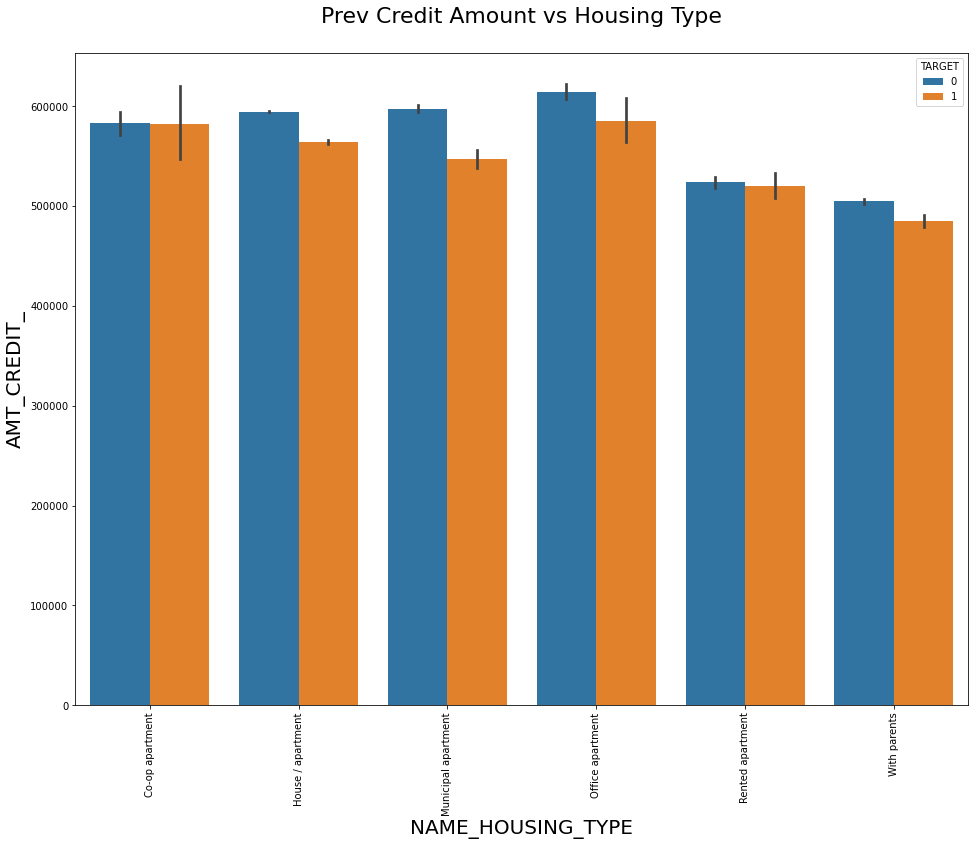

In [274]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =Bothdata, y='AMT_CREDIT_',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit Amount vs Housing Type')
plt.show()

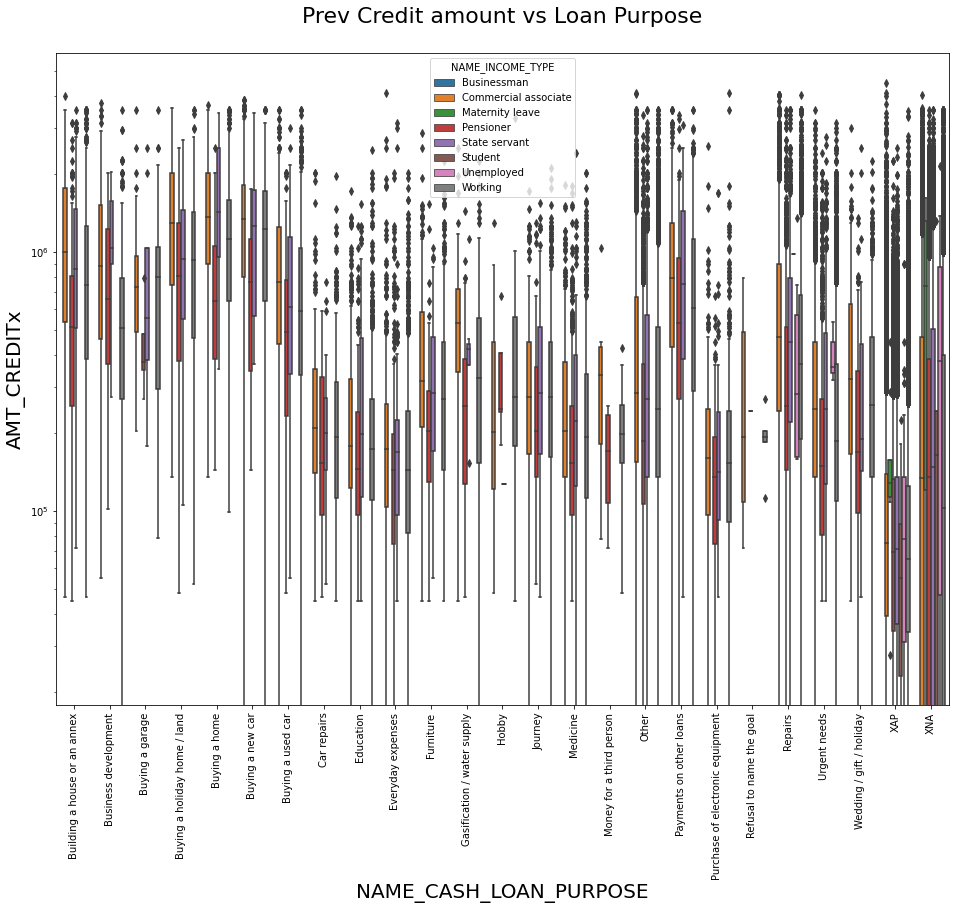

In [276]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =Bothdata, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDITx',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

#### That sums up the whole analysis process